In [1]:
#Módulos necessários
import pandas as pd
import xlrd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
x = pd.read_excel('/content/drive/MyDrive/code/data/data.xlsx')
y = pd.read_excel('/content/drive/MyDrive/code/data/target.xlsx')
data = x.to_numpy()
target = y.to_numpy()
data = data.astype('float32')


X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.1, shuffle = True) 

X_train.size, X_test.size

(33784, 3772)

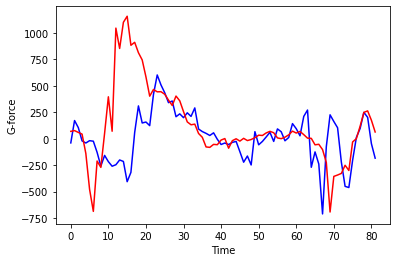

In [3]:
#Sinal Bruto
num1 = random.randint(0, 458)
num2 = random.randint(0, 458)
plt.plot(data[num1], 'b', data[num2], 'r-')
plt.xlabel('Time')
plt.ylabel('G-force')
plt.show()

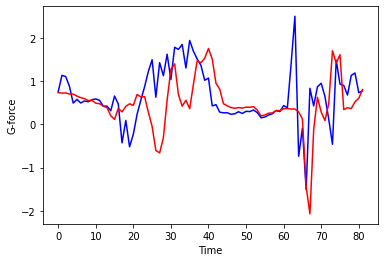

In [4]:
# Sinal normalizado

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std
#Norm Data
num1 = random.randint(0, 152)
num2 = random.randint(0, 152)
plt.plot(X_train[num1], 'b', X_train[num2], 'r-')
plt.xlabel('Time')
plt.ylabel('G-force')
plt.show()

In [12]:
# from tensorflow.keras import optimizers
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def build_model():
    model =keras.Sequential([
    keras.layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), input_shape=(82,)),
    keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'),
    keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(5, activation='softmax')])
    model.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['categorical_accuracy'])

    return model   

In [6]:
# K-fold validation

import numpy as np
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

partial_X_train = np.concatenate(
    [X_train[:i * num_val_samples],
    X_train[(i + 1) * num_val_samples:]],
    axis=0)

partial_y_train = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)

model = build_model()
model.fit(partial_X_train, partial_y_train,
          epochs=num_epochs, batch_size=1, verbose=0)
val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_acc)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [7]:
# Salvando os logs de validação 

num_epochs = 100
all_acc_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_X_train = np.concatenate(
      [X_train[:i * num_val_samples],
      X_train[(i + 1) * num_val_samples:]],
      axis=0)
    
    partial_y_train = np.concatenate(
      [y_train[:i * num_val_samples],
      y_train[(i + 1) * num_val_samples:]],
      axis=0)
    
    model = build_model()
    history = model.fit(partial_X_train, partial_y_train,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    history_dict = history.history
    history_dict.keys()

    acc = history_dict['categorical_accuracy']
    val_acc = history_dict['val_categorical_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    acc_history = history.history['categorical_accuracy']
    all_acc_histories.append(acc_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


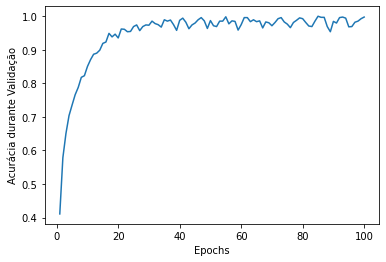

In [8]:
average_acc_history = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Acurácia durante Validação')
plt.show()

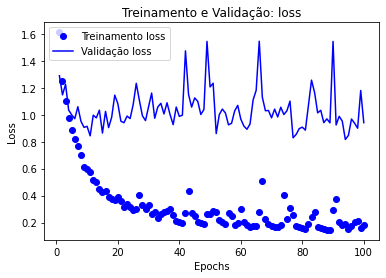

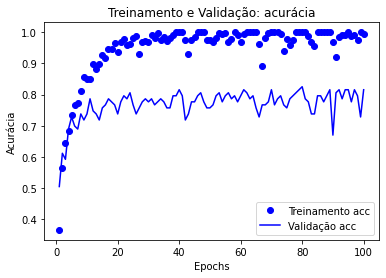

In [9]:
#Gráficos de acurácia e loss por tempo(epoch)
history_dict.keys()

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Treinamento loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validação loss')
plt.title('Treinamento e Validação: loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Treinamento acc')
plt.plot(epochs, val_acc, 'b', label='Validação acc')
plt.title('Treinamento e Validação: acurácia')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [10]:
# Treinando o modelo final

model = build_model()
model.fit(X_train, y_train,
          epochs=40, batch_size=16, verbose=1)
test_loss_score, test_acc_score = model.evaluate(X_test, y_test)

print('Test Loss score: ', test_loss_score, '.')
print('Test Acc score: ', test_acc_score, '.')



Epoch 1/40
26/26 [==============================] - 1s 2ms/step - loss: 1.7704 - categorical_accuracy: 0.2816
Epoch 2/40
26/26 [==============================] - 0s 2ms/step - loss: 1.4863 - categorical_accuracy: 0.5146
Epoch 3/40
26/26 [==============================] - 0s 2ms/step - loss: 1.3259 - categorical_accuracy: 0.5995
Epoch 4/40
26/26 [==============================] - 0s 2ms/step - loss: 1.2060 - categorical_accuracy: 0.6335
Epoch 5/40
26/26 [==============================] - 0s 2ms/step - loss: 1.1244 - categorical_accuracy: 0.6553
Epoch 6/40
26/26 [==============================] - 0s 2ms/step - loss: 1.0518 - categorical_accuracy: 0.6966
Epoch 7/40
26/26 [==============================] - 0s 2ms/step - loss: 1.0013 - categorical_accuracy: 0.7112
Epoch 8/40
26/26 [==============================] - 0s 2ms/step - loss: 0.9474 - categorical_accuracy: 0.7257
Epoch 9/40
26/26 [==============================] - 0s 2ms/step - loss: 0.8918 - categorical_accuracy: 0.7646
Epoch 10/4

In [11]:
# Modelo de teste no eixo Z

x = pd.read_excel('/content/drive/MyDrive/code/data/dataz.xlsx')
y = pd.read_excel('/content/drive/MyDrive/code/data/targetz.xlsx')
data = x.to_numpy()
target = y.to_numpy()
data = data.astype('float32')

# Normalizar os sinais

mean = data.mean(axis=0)
data -= mean
std = data.std(axis=0)
data /= std

test_loss_score, test_acc_score = model.evaluate(data, target)

print('Test Loss score: ', test_loss_score, '.')
print('Test Acc score: ', test_acc_score, '.')

5/5 [==============================] - 0s 2ms/step - loss: 0.6654 - categorical_accuracy: 0.8026
Test Loss score:  0.6653615832328796 .
Test Acc score:  0.8026315569877625 .
